<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

### https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

### data preparation and loading

In [ ]:
# using linear regression 
# parameters

weight = 0.7
bias = 0.3

start = 0
end = 1

step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

### train test split 80:20

In [ ]:
train_split = int(0.8 * len(X))
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizations

In [ ]:
def plot_visualizations(train_data=X_train,
                        train_labels=y_train,
                        test_data=X_test,
                        test_labels=y_test,
                        predictions=None
                        ):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b",s=8, label="training data")
  plt.scatter(test_data, test_labels, c="g",s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r",s=4, label="Predictions data")
  plt.legend(prop={"size":14})

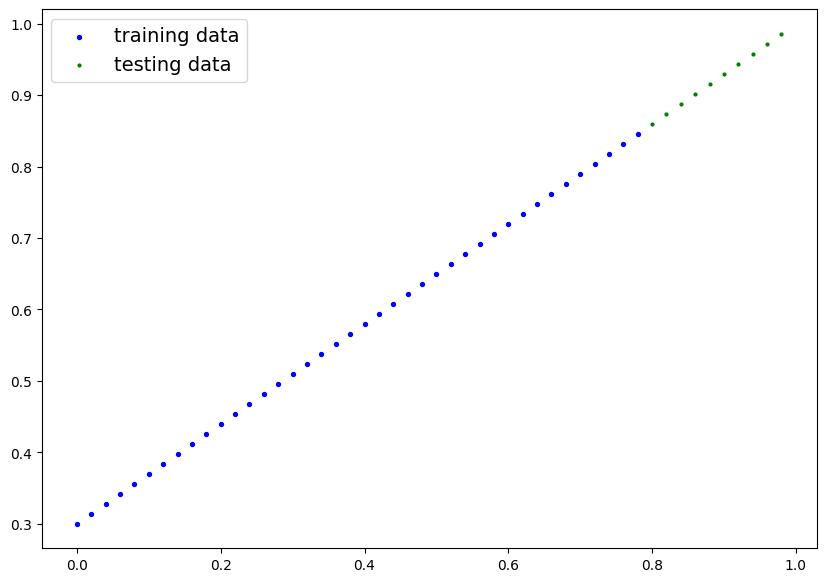

In [ ]:
plot_visualizations()

### Build Model

In [ ]:
# create a linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float)
    )
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float)
    )

  #forward method for computation
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Making prediction using torch.inference_mode()

with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

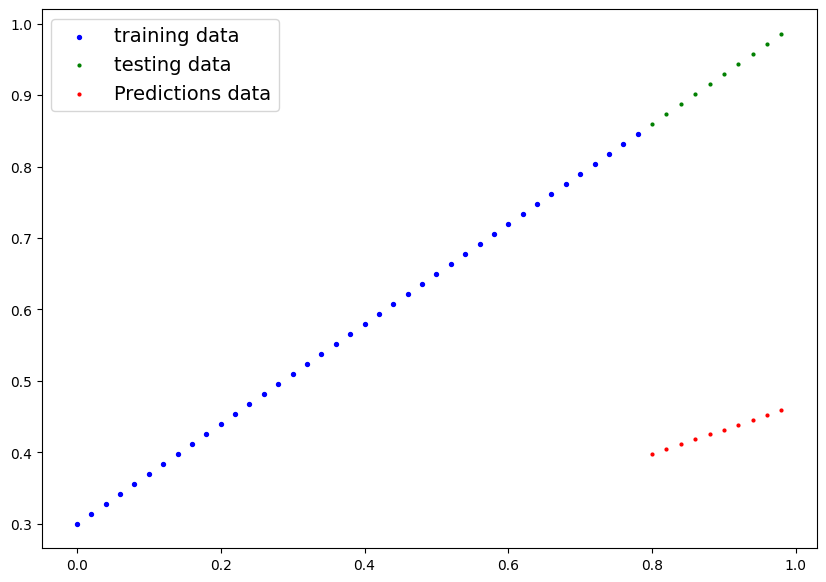

In [ ]:
plot_visualizations(predictions=y_pred)

In [ ]:
loss_fn = nn.L1Loss()

In [ ]:
learning_rate = 0.01
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=learning_rate)

### training loop & testing loop

In [ ]:
epochs = 250

epoch_count = []
loss_values = []
test_loss_values = []

for epochs in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)
  #print(loss)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
  
  epoch_count.append(epochs)
  loss_values.append(loss)
  test_loss_values.append(test_loss)

  if epochs % 10 == 0:
    print(f"Epoch: {epochs} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

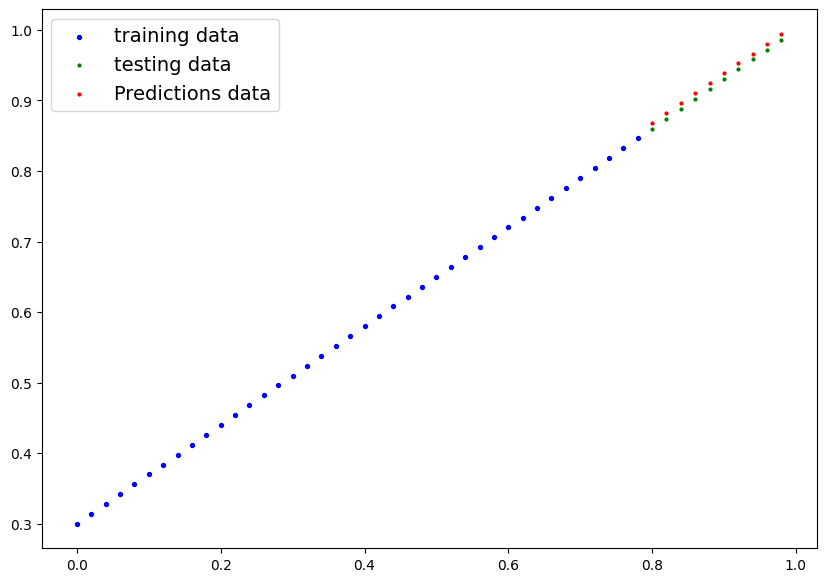

In [ ]:
plot_visualizations(predictions=y_pred_new)

In [ ]:
import numpy as np

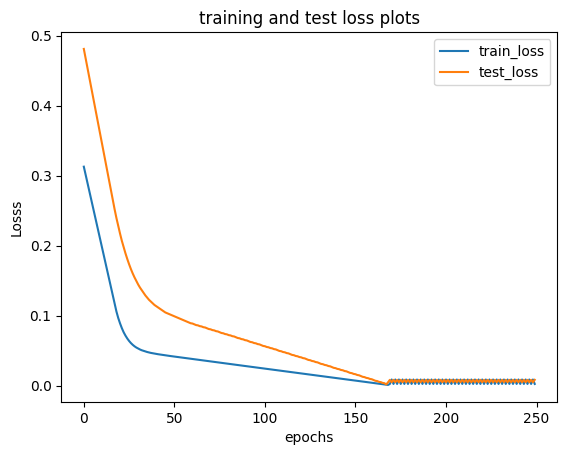

In [ ]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="train_loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="test_loss")

plt.title("training and test loss plots")
plt.ylabel("Losss")
plt.xlabel("epochs")
plt.legend()

### Saving the model

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#save PyTorch model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [ ]:
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH
           )

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Jun 10 22:27 01_pytorch_workflow_model_0.pth


In [ ]:
#loading pytorch model

loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()


OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [ ]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# All together

In [80]:
import torch
import numpy as np

from torch import nn
import matplotlib.pyplot as plt


In [81]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [82]:
bias = 0.7
weight_1 = 0.3
weight_2 = 0.6
weight_3 = 0.9

start = 0
end = 1
step = 0.02

x1 = torch.arange(start, end , step).unsqueeze(dim=1)
x2 = torch.arange(start, end/2 , step/2).unsqueeze(dim=1)
x3 = torch.arange(start, end/0.75 , step/0.75).unsqueeze(dim=1)

y = weight_1 * x1 + weight_2 * x2 + weight_3 * x3 + bias

X = torch.cat((x1,x2,x3), dim=1)
X.shape, y.shape

(torch.Size([50, 3]), torch.Size([50, 1]))

In [83]:
train_split = int(0.8*len(X))
train_split

40

In [84]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [85]:
def plot_multi_visualizations(train_data=X_train,
                        train_labels=y_train,
                        test_data=X_test,
                        test_labels=y_test,
                        predictions=None
                        ):
  plt.figure(figsize=(10,7))
  colors = ["b","g","black"]
  print(train_data.shape[1]-1)
  
  #for dim in train_data.shape[1]:
  #  plt.scatter(train_data[:,dim-1], train_labels, c='r',s=8, label="training data")
  #  plt.scatter(test_data[:,dim-1], test_labels, c="g",s=4, label="testing data")
  plt.scatter(train_data[:,0], train_labels, c='b', marker="o", label="training data_1")
  plt.scatter(train_data[:,1], train_labels, c='b', marker="o", label="training data_2")
  plt.scatter(train_data[:,2], train_labels, c='b', marker="o", label="training data_3")

  plt.scatter(test_data[:,0], test_labels, c="g", marker="D", label="testing data_1")
  plt.scatter(test_data[:,1], test_labels, c="g", marker="D", label="testing data_2")
  plt.scatter(test_data[:,2], test_labels, c="g", marker="D", label="testing data_3")

  if predictions is not None:
    plt.scatter(test_data[:,0], predictions, c="r",marker="*", label="Predictions data")
    plt.scatter(test_data[:,1], predictions, c="r",marker="*", label="Predictions data")
    plt.scatter(test_data[:,2], predictions, c="r",marker="*", label="Predictions data")

  plt.legend(prop={"size":14})

In [86]:
X_train[:,1]

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900])

2


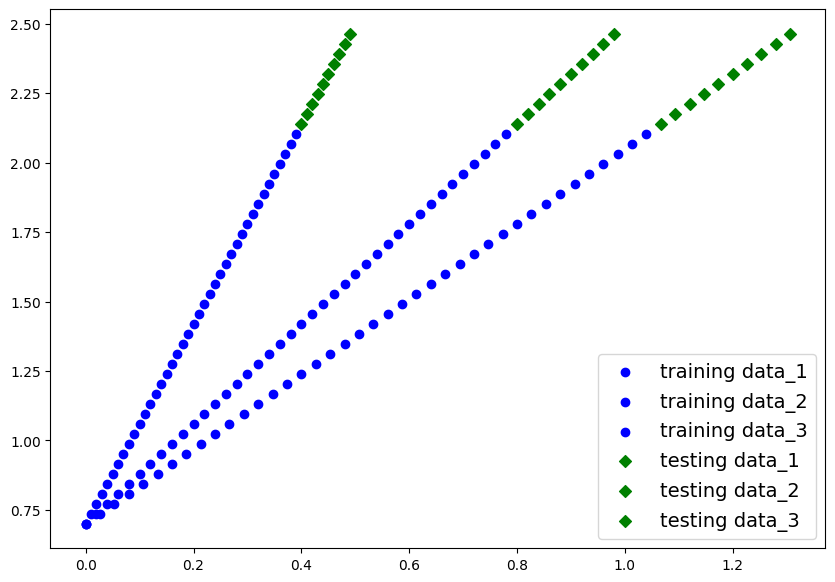

In [87]:
plot_multi_visualizations(X_train,y_train, X_test,y_test)

In [88]:
class MultiLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=3,
                                  out_features=1)
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = MultiLinearRegression()
model_1, model_1.state_dict()

(MultiLinearRegression(
   (linear_layer): Linear(in_features=3, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[ 0.4414,  0.4792, -0.1353]])),
              ('linear_layer.bias', tensor([0.5304]))]))

In [89]:
class MultiLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=3,
                                  out_features=1)
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x).squeeze(1)

In [90]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [92]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

with torch.inference_mode():
  y_pred_new_multi = model_1(X_test)

2


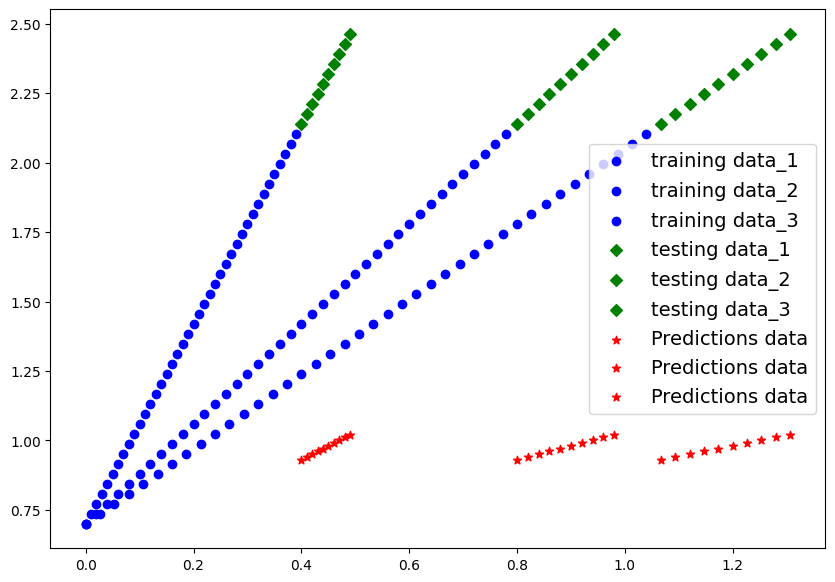

In [93]:
plot_multi_visualizations(X_train.to("cpu").numpy(),y_train.to("cpu").numpy(), X_test.to("cpu").numpy(),y_test.to("cpu").numpy(),predictions=y_pred_new_multi.to("cpu").numpy())

In [94]:
#loss function
multi_loss_fn = torch.nn.functional.mse_loss

#optimizer
multi_optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)



In [95]:
device

'cuda'

In [96]:
torch.manual_seed(42)

epochs = 200

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)
  loss = multi_loss_fn(y_pred, y_train)
  multi_optimizer.zero_grad()
  loss.backward()
  multi_optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = multi_loss_fn(test_pred, y_test)

  if epoch % 10 ==0:
    print(f"epoch: {epoch} Loss: {loss} test_loss: {test_loss}")


epoch: 0 Loss: 0.5474743247032166 test_loss: 1.0266618728637695
epoch: 10 Loss: 0.017143845558166504 test_loss: 0.07025710493326187
epoch: 20 Loss: 0.010898353531956673 test_loss: 0.03953878954052925
epoch: 30 Loss: 0.007085231598466635 test_loss: 0.025576889514923096
epoch: 40 Loss: 0.0046063675545156 test_loss: 0.01662566140294075
epoch: 50 Loss: 0.002994768088683486 test_loss: 0.010808887891471386
epoch: 60 Loss: 0.0019470067927613854 test_loss: 0.007027238141745329
epoch: 70 Loss: 0.001265820232219994 test_loss: 0.004568667616695166
epoch: 80 Loss: 0.0008229556842707098 test_loss: 0.0029702612664550543
epoch: 90 Loss: 0.0005350331193767488 test_loss: 0.0019310697680339217
epoch: 100 Loss: 0.00034784464514814317 test_loss: 0.0012554599670693278
epoch: 110 Loss: 0.000226146265049465 test_loss: 0.0008162218146026134
epoch: 120 Loss: 0.0001470259012421593 test_loss: 0.0005306560778990388
epoch: 130 Loss: 9.558772580930963e-05 test_loss: 0.0003449998330324888
epoch: 140 Loss: 6.21450089

In [97]:
with torch.inference_mode():
  y_pred_new_multi = model_1(X_test)

2


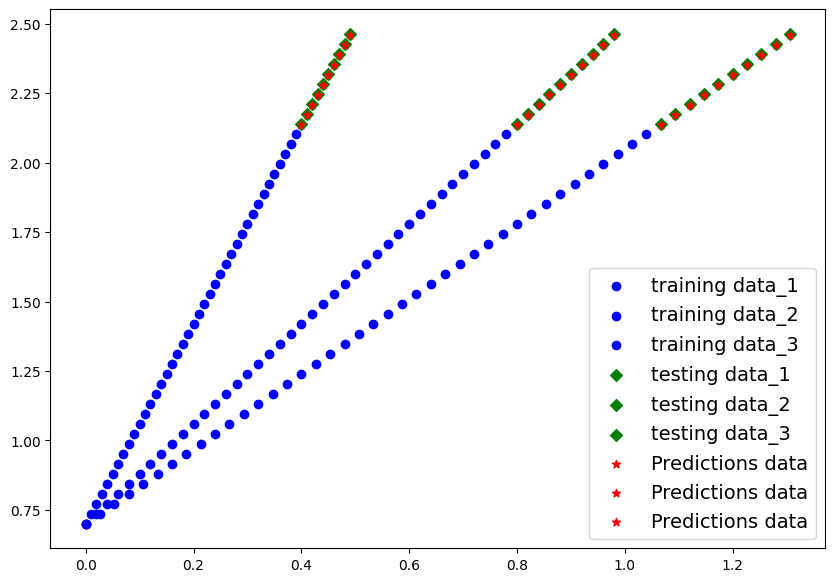

In [98]:
plot_multi_visualizations(X_train.to("cpu").numpy(),y_train.to("cpu").numpy(), X_test.to("cpu").numpy(),y_test.to("cpu").numpy(),predictions=y_pred_new_multi.to("cpu").numpy())